In [1]:
import numpy as np
from pathlib import Path

# Load processed feature files
processed_dir = Path("../data_processed")

X = np.load(processed_dir / "X.npy")
labels = np.load(processed_dir / "labels.npy")

print("X shape:", X.shape)
print("labels shape:", labels.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../data_processed/labels.npy'

In [2]:
import numpy as np
from pathlib import Path

processed_dir = Path("../data_processed")

X = np.load(processed_dir / "X.npy")
labels = np.load(processed_dir / "labels.npy")

print("X shape:", X.shape)
print("Labels shape:", labels.shape)

X shape: (720, 69)
Labels shape: (720,)


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42, stratify=labels
)

# model
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# predictions
pred = clf.predict(X_test)
prob = clf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, prob))

Accuracy: 0.8819444444444444
ROC AUC: 0.6688281611857341


In [4]:
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

processed_dir = Path("../data_processed")

X = np.load(processed_dir / "X.npy")
labels = np.load(processed_dir / "labels.npy")

print("X shape:", X.shape)
print("labels shape:", labels.shape)

# 1) train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42, stratify=labels
)

X shape: (5760, 69)
labels shape: (5760,)


In [5]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

print("RandomForest Accuracy:", accuracy_score(y_test, rf_pred))
print("RandomForest ROC AUC:", roc_auc_score(y_test, rf_prob))

RandomForest Accuracy: 1.0
RandomForest ROC AUC: 0.9999999999999999


In [6]:
logreg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"  # helps with imbalance
)
logreg.fit(X_train, y_train)

lr_pred = logreg.predict(X_test)
lr_prob = logreg.predict_proba(X_test)[:, 1]

print("LogReg Accuracy:", accuracy_score(y_test, lr_pred))
print("LogReg ROC AUC:", roc_auc_score(y_test, lr_prob))

LogReg Accuracy: 0.8862847222222222
LogReg ROC AUC: 0.5


In [7]:
svm = SVC(kernel="linear", probability=True, class_weight="balanced", random_state=42)
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
svm_prob = svm.predict_proba(X_test)[:, 1]

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM ROC AUC:", roc_auc_score(y_test, svm_prob))

SVM Accuracy: 0.8862847222222222
SVM ROC AUC: 0.36963461955424637


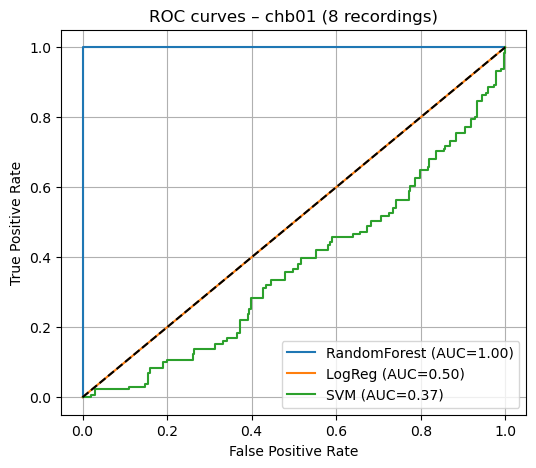

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

models = {
    "RandomForest": (rf_prob, "tab:blue"),
    "LogReg": (lr_prob, "tab:orange"),
    "SVM": (svm_prob, "tab:green"),
}

plt.figure(figsize=(6, 5))

for name, (probs, color) in models.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves – chb01 (8 recordings)")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from pathlib import Path
import numpy as np

processed_dir = Path("../data_processed")

X = np.load(processed_dir / "X.npy")
labels = np.load(processed_dir / "labels.npy")

print("X shape:", X.shape)
print("labels shape:", labels.shape)

X shape: (5760, 69)
labels shape: (5760,)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# --- split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42, stratify=labels
)

# --- scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}

# ================================
# 1️⃣ Logistic Regression
# ================================
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)
pred_log = log_reg.predict(X_test_scaled)
prob_log = log_reg.predict_proba(X_test_scaled)[:,1]

results["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, pred_log),
    "ROC-AUC": roc_auc_score(y_test, prob_log)
}

# ================================
# 2️⃣ Support Vector Machine (linear)
# ================================
svm = SVC(kernel="linear", probability=True)
svm.fit(X_train_scaled, y_train)
pred_svm = svm.predict(X_test_scaled)
prob_svm = svm.predict_proba(X_test_scaled)[:,1]

results["SVM"] = {
    "Accuracy": accuracy_score(y_test, pred_svm),
    "ROC-AUC": roc_auc_score(y_test, prob_svm)
}

# ================================
# 3️⃣ Shallow Neural Network
# ================================
mlp = MLPClassifier(hidden_layer_sizes=(32,), max_iter=500)
mlp.fit(X_train_scaled, y_train)
pred_mlp = mlp.predict(X_test_scaled)
prob_mlp = mlp.predict_proba(X_test_scaled)[:,1]

results["Neural Network (MLP)"] = {
    "Accuracy": accuracy_score(y_test, pred_mlp),
    "ROC-AUC": roc_auc_score(y_test, prob_mlp)
}

# --- print results ---
for model, scores in results.items():
    print(f"\n🔹 {model}")
    print(f"   Accuracy: {scores['Accuracy']:.4f}")
    print(f"   ROC-AUC:  {scores['ROC-AUC']:.4f}")


🔹 Logistic Regression
   Accuracy: 0.8863
   ROC-AUC:  0.7697

🔹 SVM
   Accuracy: 0.8863
   ROC-AUC:  0.7054

🔹 Neural Network (MLP)
   Accuracy: 1.0000
   ROC-AUC:  1.0000
